**Muhammad Akram Dhaifullah<br>
202010370311184<br>
Temu Kembali Citra 7C**

1. Import library opencv, pyplot, numpy, dan scikit-image

In [59]:
# Tulis kode Anda disini
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import os
from skimage import feature

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = "/content/drive/MyDrive/Kuliah/Semester 7/IMG RETRIEVAL 7C/images/"

2. Upload sebuah citra yang terlalu gelap/terang, kemudian lakukan processing agar citra tersebut dapat terlihat lebih baik. Tampilkan citra asli dan citra hasil processing!

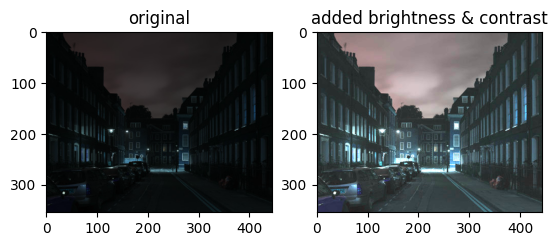

In [5]:
# Tulis kode Anda disini
image = cv2.imread(path+"img-dark.jpg")

plt.subplot(1, 2, 1)
plt.title("original")
plt.imshow(image)

brightness = 30
contrast = 3

image_modified = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)
plt.subplot(1, 2, 2)
plt.title("added brightness & contrast")
plt.imshow(image_modified)

3. Upload sebuah citra yang memiliki noise (bintik-bintik di keseluruhan citra), kemudian lakukan processing agar citra tersebut dapat terlihat lebih baik. Tampilkan citra asli dan citra hasil processing!

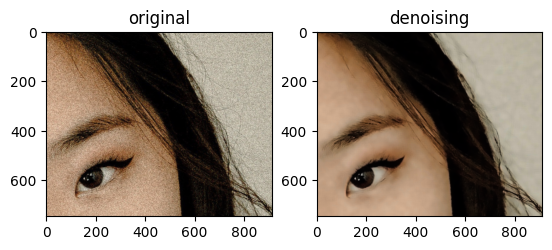

In [6]:
# Tulis kode Anda disini
image = cv2.imread(path+"img-noise.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.title("original")
plt.imshow(image)

img_denoise = cv2.fastNlMeansDenoisingColored(image, None, 22, 22, 7, 21)

plt.subplot(1, 2, 2)
plt.title("denoising")
plt.imshow(img_denoise)

4. Upload sebuah citra, kemudian lakukan processing agar citra tersebut tampak lebih tajam (sharp). Tampilkan citra asli dan citra hasil processing!

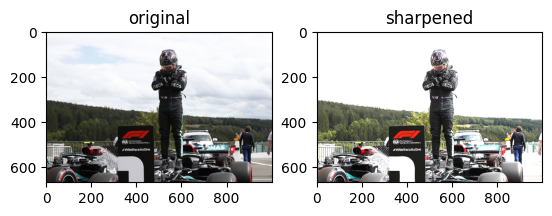

In [7]:
# Tulis kode Anda disini
img_goat = cv2.imread(path+"img-lewis.jpg")
img_goat = cv2.cvtColor(img_goat, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.title("original")
plt.imshow(img_goat)

kernel = np.array([[0, -1, 0],
                   [-1, 6, -1],
                   [0, -1, 0]])

img_goat_sharpened = cv2.filter2D(src=img_goat, ddepth=-1, kernel=kernel)
plt.subplot(1, 2, 2)
plt.title("sharpened")
plt.imshow(img_goat_sharpened)


5. Upload sebuah citra yang menampilkan halaman sebuah buku, kemudian lakukan geometric transformation agar halaman tersebut dapat terlihat lebih baik (simetris). Tampilkan citra asli dan citra hasil processing!

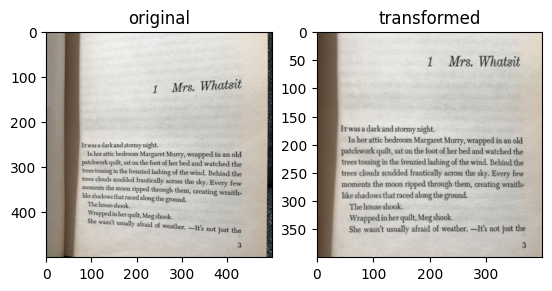

In [8]:
# Tulis kode Anda disini
img_page = cv2.imread(path+"img-page.jpg")
img_page = cv2.cvtColor(img_page, cv2.COLOR_BGR2RGB)
rows, cols, ch = img_page.shape

plt.subplot(1, 2, 1)
plt.title("original")
plt.imshow(img_page)

pts1 = np.float32([[40, 90], [490, 50],
                   [40, 460], [470, 500]])

pts2 = np.float32([[0, 0], [400, 0],
                   [0, 400], [400, 400]])

M = cv2.getPerspectiveTransform(pts1,pts2)
img_page_transformed = cv2.warpPerspective(img_page, M, (400, 400))
plt.subplot(1, 2, 2)
plt.title("transformed")
plt.imshow(img_page_transformed)

6. Upload sebuah citra yang memiliki coretan di atasnya, kemudian lakukan processing agar citra tersebut dapat kembali seperti semula (tanpa coretan). Tampilkan citra asli dan citra hasil processing!

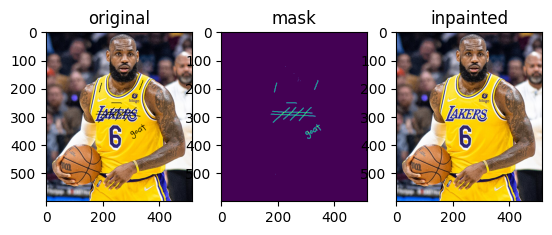

In [41]:
# Tulis kode Anda disini

# reading the damaged image
damaged_img = cv2.imread(path+"img-scribbled.png")

# get the shape of the image
height, width = damaged_img.shape[0], damaged_img.shape[1]

# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            damaged_img[i, j] = 0
        else:
            damaged_img[i, j] = [255, 255, 255]

# saving the mask
mask = damaged_img
cv2.imwrite('mask.png', mask)

# Open the image.
img = cv2.imread(path+"img-scribbled.png")

# Load the mask.
mask = cv2.imread('mask.png', cv2.IMREAD_GRAYSCALE)

# Inpaint.
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

# Write the output.
cv2.imwrite('inpainted.png', dst)

# show the images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 1)
plt.title("original")
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.title("mask")
plt.imshow(mask)

dst = cv2.imread("inpainted.png")
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 3)
plt.title("inpainted")
plt.imshow(dst)


7. Upload sebuah citra berukuran besar. Kemudian lakukan teknik losless dan lossy compression. Tampilkan ukuran citra asli, citra hasil kompresi losless, dan citra hasil kompresi lossy!

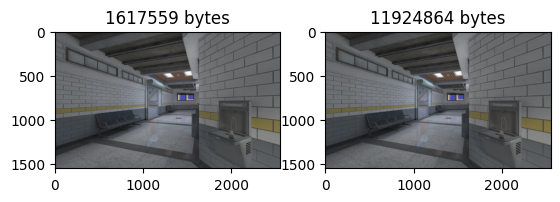

In [50]:
# Tulis kode Anda disini

img = cv2.imread(path+"img-overpass.jpg")
original_size = os.path.getsize(path+"img-overpass.jpg")

# compress with lossless compression
img_lossless_name = "lossless.png"
cv2.imwrite(img_lossless_name, img, [cv2.IMWRITE_PNG_COMPRESSION, 0])


# Verify the compression
img_lossless = cv2.imread(img_lossless_name)
lossless_size = os.path.getsize(img_lossless_name)

#  show the images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.title(str(original_size) + " bytes")
plt.imshow(img)

img_lossless = cv2.cvtColor(img_lossless, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.title(str(lossless_size) + " bytes")
plt.imshow(img_lossless)

8. Upload sebuah citra berwarna. Kemudian tampilkan citra asli serta histogram dari tiap channelnya (RGB) secara berdampingan!

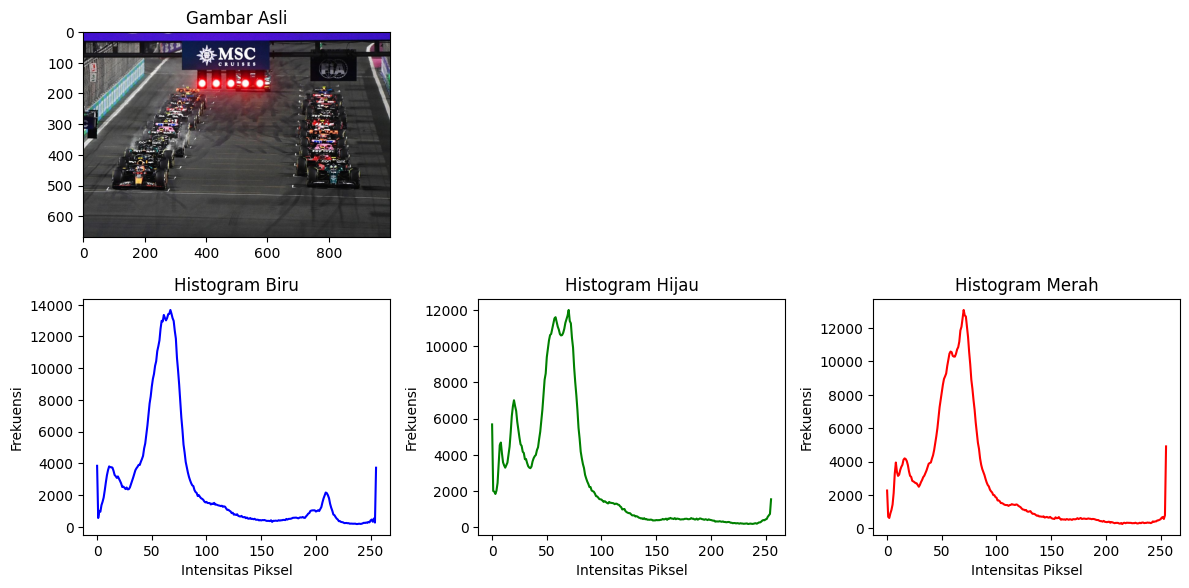

In [52]:
# Tulis kode Anda disini

# Baca gambar
image = cv2.imread(path+'f1-grid.jpg')

# Ubah gambar ke mode warna BGR (jika belum dalam mode itu)
if len(image.shape) == 3:
    b, g, r = cv2.split(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image

# Hitung histogram untuk masing-masing channel warna (BGR)
hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Tampilkan histogram
plt.subplot(234)
plt.title('Histogram Biru')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.plot(hist_b, color='blue')

plt.subplot(235)
plt.title('Histogram Hijau')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.plot(hist_g, color='green')

plt.subplot(236)
plt.title('Histogram Merah')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.plot(hist_r, color='red')

plt.tight_layout()
plt.show()

9. Upload sebuah citra berwarna. Kemudian lakukan deteksi tepi menggunakan operator sobel. Tampilkan citra asli, citra hasil deteksi menggunakan sobel-x, sobel-y, dan sobel-xy secara berdampingan!

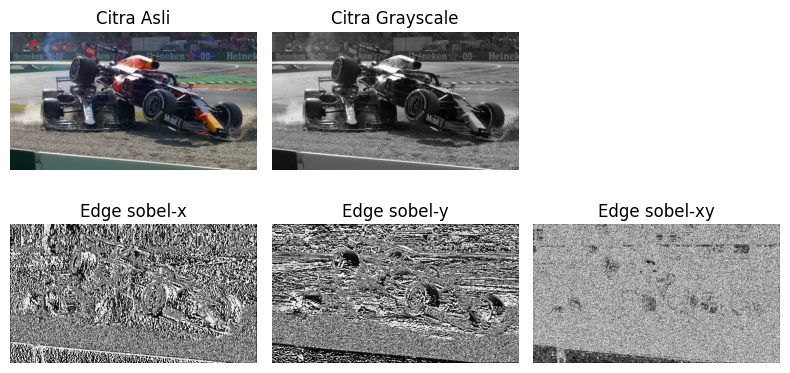

In [58]:
# Tulis kode Anda disini

# Membaca gambar
img = cv2.imread(path+'lewis-max.jpg')

# Mengubah gambar menjadi grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menghitung turunan horizontal dan vertikal
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

# Mengubah tipe data output menjadi uint8
sobelx = np.uint8(sobelx*255)
sobely = np.uint8(sobely*255)

# Menggabungkan sobelx dan sobely dengan menggunakan akar kuadrat
imgboth = np.sqrt(np.square(sobelx) + np.square(sobely))

# Tampilkan citra asli
plt.figure(figsize=(8, 4))
plt.subplot(231)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Tampilkan citra grayscale
plt.subplot(232)
plt.title('Citra Grayscale')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(234)
plt.title('Edge sobel-x')
plt.imshow(sobelx, cmap='gray')
plt.axis('off')

plt.subplot(235)
plt.title('Edge sobel-y')
plt.imshow(sobely, cmap='gray')
plt.axis('off')

plt.subplot(236)
plt.title('Edge sobel-xy')
plt.imshow(imgboth, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

10. Upload sebuah citra berwarna. Kemudian lakukan deteksi tekstur menggunakan Local Binary Patter (LBP). Tampilkan citra asli dan citra hasil processing secara berdampingan!

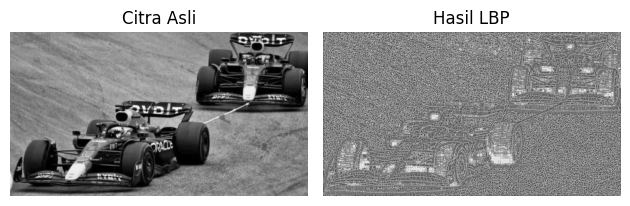

In [60]:
# Tulis kode Anda disini

# Baca gambar
image = cv2.imread(path+'redbull-meme.jpg', cv2.IMREAD_GRAYSCALE)

# Hitung LBP
lbp_image = feature.local_binary_pattern(image, 8, 1, method="uniform")

# Konversi hasil LBP ke tipe data 8-bit
lbp_image = np.uint8((lbp_image / lbp_image.max()) * 255)

# Tampilkan gambar asli
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Tampilkan hasil LBP
plt.subplot(122)
plt.title('Hasil LBP')
plt.imshow(lbp_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()